In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
np.random.seed(123)
n_samples = 100

X = (np.linspace(-5, 5, n_samples) - np.random.randn(n_samples))

y =  (X)**2 - 2 * np.random.randn(n_samples) ** 2
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
        X[:, np.newaxis], y, test_size=0.30)

(100,)


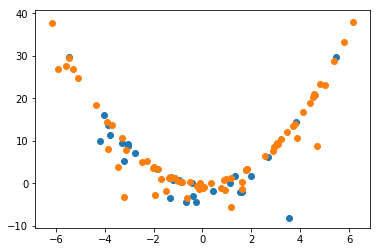

In [3]:
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)

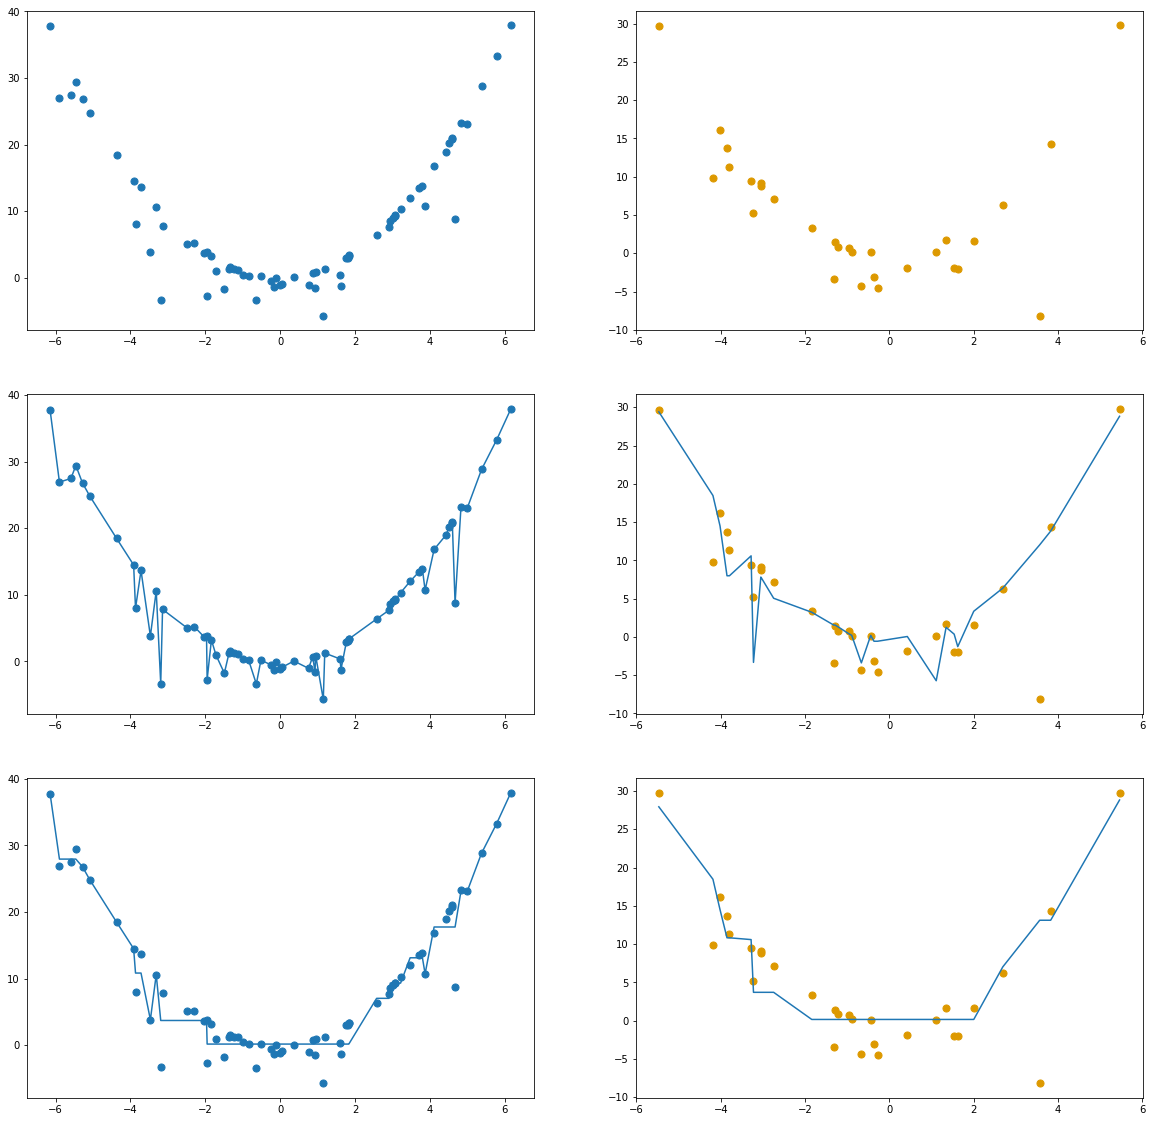

In [4]:


fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=False, sharey=False,
                         figsize=(20, 20))

axes[0][0].scatter(X_train, y_train, s=50)
axes[0][1].scatter(X_test, y_test, color="#dd9900", s=50)

# training tree to its maximum depth 
dt = DecisionTreeRegressor().fit(X_train, y_train)

axes[1][0].scatter(X_train, y_train, s=50)
axes[1][0].plot(X_train[np.argsort(X_train.ravel())], dt.predict(X_train[np.argsort(X_train.ravel())]))
axes[1][1].scatter(X_test, y_test, color="#dd9900", s=50)
axes[1][1].plot(X_test[np.argsort(X_test.ravel())], dt.predict(X_test[np.argsort(X_test.ravel())]))

# training pre-pruned tree
dt = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

axes[2][0].scatter(X_train, y_train, s=50)
axes[2][0].plot(X_train[np.argsort(X_train.ravel())], dt.predict(X_train[np.argsort(X_train.ravel())]))
axes[2][1].scatter(X_test, y_test, color="#dd9900", s=50)
axes[2][1].plot(X_test[np.argsort(X_test.ravel())], dt.predict(X_test[np.argsort(X_test.ravel())]))

0.357142857143


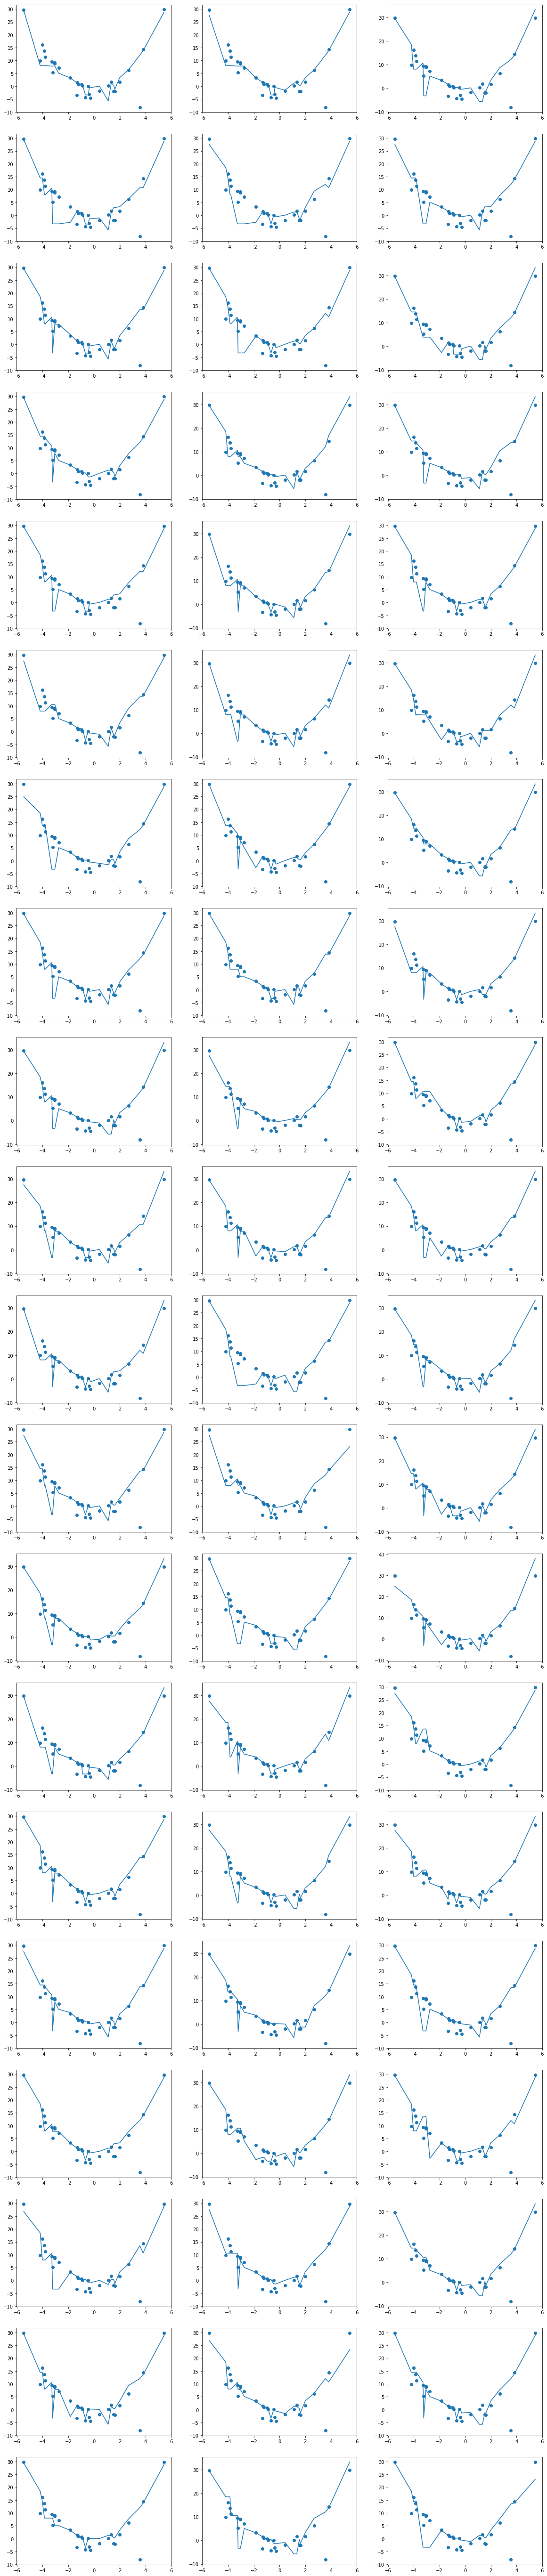

In [5]:
ids = np.arange(X_train.shape[0])
n_iterations = 60
ncols= 3

fig, axes = plt.subplots(nrows=n_iterations/ncols,
                         ncols=ncols, 
                         sharex=False, sharey=False, 
                         figsize=(20, 100))
# print(fig.__dict__)
dts =[]
data_samples = []
soma=0

for i in range(n_iterations):
    sample = np.random.choice(ids, X_train.shape[0])
    data_samples.append(sample)
    soma += X_train.shape[0] - np.unique(sample).shape[0]
    dt = DecisionTreeRegressor()
    dts.append(dt.fit(X_train[sample], y_train[sample]))
    ax = axes[i/ncols][i%ncols]
    
    ax.scatter(X_test, y_test)
    ax.plot(X_test[np.argsort(X_test.ravel(), axis=0)], dt.predict(X_test[np.argsort(X_test.ravel(), axis=0)]))
    
print((soma/n_iterations) / float(X_train.shape[0]))

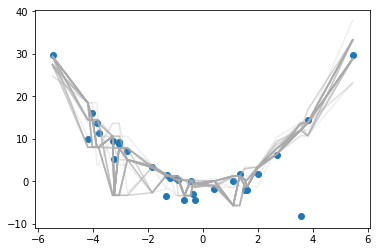

In [6]:
for i in range(n_iterations):
    plt.plot(X_test[np.argsort(X_test.ravel(), axis=0)],
             dts[i].predict(X_test[np.argsort(X_test.ravel(), axis=0)]), color='#aaaaaa33')
    
plt.scatter(X_test, y_test)

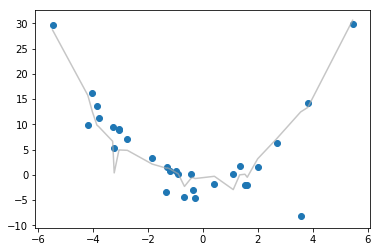

In [7]:
bagging_pred = np.zeros(y_test.shape)
for i in range(n_iterations):
    bagging_pred += dts[i].predict(X_test[np.argsort(X_test.ravel(), axis=0)])
    
plt.plot(X_test[np.argsort(X_test.ravel(), axis=0)], bagging_pred / n_iterations
             , color='#aaaaaaaa')    
plt.scatter(X_test, y_test)